<a href="https://colab.research.google.com/github/aleonferuoc/E-motions/blob/main/twitter_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRERÍAS

In [5]:
%pip install ipykernel
%pip install seaborn
%pip install opendatasets
%pip install plotly
%pip install nltk
%pip install numpy
%pip install pandas
%pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
%pip install sklearn
%pip install wordcloud
%pip install textblob
%pip install wordcloud
%pip install scikit-learn
%pip install snscrape
#%pip install re
#%pip install itertools


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=350639cd0e786b70d489c3905dd15ec7760008e39c6ea59d17210b83b48aad42
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 3.3 MB/s 


In [ ]:
%pip install imblearn
%pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# librería opendatasets (descargar set de datos a través de la url de kaggle)
import sys
# Librería de tratamiento de datos
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
# funciones algebráicas
import numpy as np
import math
# visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
#plt.style.use('fivethirtyeight')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
## Modulo que contiene funciones específicas dedicadas a la creación de gráficos específicos
import plotly.figure_factory as ff
# inicializar un diccionario que tiene valores predeterminados para claves que aún no se han configurado
from collections import defaultdict, Counter, OrderedDict
# Control tiempo
import time
# Control y manejo de fechas
from datetime import datetime
# Expresiones regulares
import re
import string
# Funciones de iteración
from itertools import product
# Guardar variable en archivo
from pickle import dump
# Análisis de textos
# Tratamiento de textos
import nltk
## Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
## Corrección y tipificación del texto
from textblob import TextBlob, Word, Blobber
## Derivación y lematización
from nltk.stem import PorterStemmer
## N-gramas
from nltk.util import ngrams
## tokenizador, bigramas y trigramas
from nltk import word_tokenize, bigrams, trigrams
## Analizador de sentimientos
from nltk.sentiment.vader import SentimentIntensityAnalyzer
## Vectorizador de texto
from sklearn.feature_extraction.text import TfidfVectorizer
# Generación de nube de palabras
from wordcloud import WordCloud, STOPWORDS
# Raspado de tweets
import snscrape.modules.twitter as sntwitter
# Modelos de Machine Learning
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
## Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
## Métricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc, roc_auc_score, plot_roc_curve
# Deshabilitación de los avisos
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# OBTENCIÓN DE INFORMACIÓN DE TWITTER

## Método para la extracción de twitters según palabra clave o nombre de usuario

In [ ]:
# Creación de una función para extraer información de twitter mediante una palabra clave

def tweetSearch(max_tweets, keyword='', from_date='', to_date='', language=''):
    '''
    Función que devuelve un set de datos con la información referida a una palabra clave
    '''
    # Creación de una lista para añadir los datos derivados de los tweets
    tweets_list = []
    # Utilización del método TwitterSearchScraper para raspar los datos y añadirlos a la lista
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(f'{keyword} since:{from_date} until:{to_date} lang:{language}').get_items()):
        if i > max_tweets:
            break
        try:
            tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
        except TypeError:
            pass

    df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet_Id', 'Text', 'Username'])
    return df


In [ ]:
def tweetUser(max_tweets, username='', from_date='', to_date='', language=''):
    '''
    Función que devuelve un set de datos con la información referida a usuario registrado de twitter
    '''
    # Creación de una lista para añadir los datos derivados de los tweets
    tweets_list = []
    # Utilización del método TwitterSearchScraper para raspar los datos y añadirlos a la lista
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(f'from:{username} since:{from_date} until:{to_date} lang:{language}').get_items()):
        if i > max_tweets:
            break
        try:
            tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
        except TypeError:
            pass

    df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet_Id', 'Text', 'Username'])
    return df


## Twits últimos día del mundial


In [ ]:
df = tweetSearch(20000, keyword='mundial', from_date='2022-11-20', to_date='2022-12-19', language='es')

In [ ]:
df

,Datetime,Tweet_Id,Text,Username
0,2022-12-18 23:59:59+00:00,1604627570431082497,Ahora entienden a los de Independiente que lo ...,BustosNeta
1,2022-12-18 23:59:59+00:00,1604627570359734272,@Susita31 @Angelo__20 @Aitor2020 @fifaworldcup...,JanierRMbil
2,2022-12-18 23:59:59+00:00,1604627568954482688,"@fifaworldcup_es Esto si fue un robo jajaja, q...",MarcePekar
3,2022-12-18 23:59:59+00:00,1604627568686153728,@fifaworldcup_es Las flores 🫶🏻🇦🇷 https://t.co/...,RamaZurro
4,2022-12-18 23:59:59+00:00,1604627568505896960,Sigan llorando por la herida. Argentina ganó ...,lutono
...,...,...,...,...
19996,2022-12-18 22:51:26+00:00,1604610318520533002,te voy a extrañar mucho mundial 🫶🏻,ValeriaEchavar5
19997,2022-12-18 22:51:26+00:00,1604610318432346112,#FIFAWorldCup2022 #directvsports\nLo bueno: Ga...,mrkmilin
19998,2022-12-18 22:51:25+00:00,1604610314330288128,@madibooo Es que no gano Francia el Mundial!!,AquilarMoran
19999,2022-12-18 22:51:25+00:00,1604610314116505601,"@edufeiok Dijo absolutamente la verdad, todo e...",74carlosnob


**Como se puede ver, se han obtenido los tweets escritos sobre el mundial  desde unas semanas antes hasta el final (30000 tweets).**

Guardamos el csv


In [ ]:
df.to_csv('tweets_mundial.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ANÁLISIS EXPLORATORIO DEL TEXTO

## Limpieza del texto
* Primero se va a realizar una limpieza del texto para eliminar aquellos caracteres que no resulten de importancia.

In [ ]:
file = open('/content/drive/MyDrive/e-MOTIONS_2022_23_aula2/Reto 3/Caso Práctico/Archivos/SmartStoplist.txt')
words = file.readlines()
stopwords = ''
stopwords += ''.join(words)
stopwords = stopwords.split()
stopwords
file.close()

In [ ]:
# Limpieza de texto
def clean_tweet_text(x):
    '''
    Devuelve el texto limpio de caracteres que no aportan información de interés
    '''
    # Uniformidad de texto con todas las palabras en minúsculas
    text = x.lower()
    # Eliminación de hashtags y menciones
    text = re.sub('@[A-Za-z0-9_]+', '', text)
    text = re.sub('#[A-Za-z0-9_]+', '', text)
    # Eliminación de links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www.\S+', '', text)
    # Eliminación de caracteres de puntuación
    text = re.sub('[\.*?()!]+', '', text)
    # Filtrar caracteres no alfanuméricos
    text = re.sub('[^a-z0-9]', ' ', text)
    # Eliminar espacios adicionales
    text = re.sub('\s{2,}', ' ', text)
    return text


In [ ]:
df['Narr'] = df['Text'].apply(lambda x: clean_tweet_text(x))
df.head()

,Datetime,Tweet_Id,Text,Username,Narr
0,2022-12-18 23:59:59+00:00,1604627570431082497,Ahora entienden a los de Independiente que lo ...,BustosNeta,ahora entienden a los de independiente que lo ...
1,2022-12-18 23:59:59+00:00,1604627570359734272,@Susita31 @Angelo__20 @Aitor2020 @fifaworldcup...,JanierRMbil,no es normal a los que nos gusta el f tbol no...
2,2022-12-18 23:59:59+00:00,1604627568954482688,"@fifaworldcup_es Esto si fue un robo jajaja, q...",MarcePekar,esto si fue un robo jajaja que la chupen y qu...
3,2022-12-18 23:59:59+00:00,1604627568686153728,@fifaworldcup_es Las flores 🫶🏻🇦🇷 https://t.co/...,RamaZurro,las flores
4,2022-12-18 23:59:59+00:00,1604627568505896960,Sigan llorando por la herida. Argentina ganó ...,lutono,sigan llorando por la herida argentina gan muy...


## Recuperaciones de menciones y hashtags de tweets
* Podría resultar interesante recuperar las menciones. Es decir si el tweet responde a alguna conversación

In [ ]:
# Recuperar menciones del tweet
def mention(x):
    mentions = []
    text = x.split()
    for i, word in enumerate(text):
        if word.startswith('@'):
            mentions.append(word.strip().replace('.','').replace(',', '').replace('!', ''))
        else:
            continue
    if mentions == []:
        return np.nan
    else:
        return ', '.join(mentions)

# Recuperación de hashtags

def hashtags(x):
    hashtags = []
    text = x.split()
    for i, word in enumerate(text):
        if word.startswith('#'):
            hashtags.append(word.strip().replace('.','').replace(',', '').replace('!', ''))
        else:
            continue
    if hashtags == []:
        return np.nan
    else:
        return ', '.join(hashtags)

In [ ]:
df['Mention'] = df['Text'].apply(lambda x: mention(x))
df['Hashtag'] = df['Text'].apply(lambda x: hashtags(x))

In [ ]:
df.head()

,Datetime,Tweet_Id,Text,Username,Narr,Mention,Hashtag
0,2022-12-18 23:59:59+00:00,1604627570431082497,Ahora entienden a los de Independiente que lo ...,BustosNeta,ahora entienden a los de independiente que lo ...,NaN,NaN
1,2022-12-18 23:59:59+00:00,1604627570359734272,@Susita31 @Angelo__20 @Aitor2020 @fifaworldcup...,JanierRMbil,no es normal a los que nos gusta el f tbol no...,"@Susita31, @Angelo__20, @Aitor2020, @fifaworld...",NaN
2,2022-12-18 23:59:59+00:00,1604627568954482688,"@fifaworldcup_es Esto si fue un robo jajaja, q...",MarcePekar,esto si fue un robo jajaja que la chupen y qu...,@fifaworldcup_es,NaN
3,2022-12-18 23:59:59+00:00,1604627568686153728,@fifaworldcup_es Las flores 🫶🏻🇦🇷 https://t.co/...,RamaZurro,las flores,@fifaworldcup_es,NaN
4,2022-12-18 23:59:59+00:00,1604627568505896960,Sigan llorando por la herida. Argentina ganó ...,lutono,sigan llorando por la herida argentina gan muy...,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Datetime  20001 non-null  datetime64[ns, UTC]
 1   Tweet_Id  20001 non-null  int64              
 2   Text      20001 non-null  object             
 3   Username  20001 non-null  object             
 4   Narr      20001 non-null  object             
 5   Mention   10036 non-null  object             
 6   Hashtag   1387 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 1.1+ MB


In [ ]:
df[~df['Hashtag'].isnull()]

,Datetime,Tweet_Id,Text,Username,Narr,Mention,Hashtag
33,2022-12-18 23:59:53+00:00,1604627543390289921,"@casciari Grande #Messi, pero me echó a perder...",gcardenas_alva,grande pero me ech a perder mi cuento del con...,"@casciari, @ComunidadOrsai",#Messi
36,2022-12-18 23:59:53+00:00,1604627541347557377,"No se mucho, mejor dicho ni bosta de fútbol pe...",JuanGabrielR_OK,no se mucho mejor dicho ni bosta de f tbol per...,NaN,#Moments
39,2022-12-18 23:59:52+00:00,1604627540651511808,El Ángel de la Independencia se pinta de albic...,lalojimjuarez,el ngel de la independencia se pinta de albice...,NaN,"#LionelMessi, #Argentina, #Qatar2022"
44,2022-12-18 23:59:52+00:00,1604627538487128064,@FinoYossen Que pelotudo! Así votan … le hubie...,Ganadocereales,que pelotudo as votan le hubieran ense ado a ...,@FinoYossen,#messi
54,2022-12-18 23:59:50+00:00,1604627532149657600,#Entérate | 🇳🇮🇲🇽.@lopezobrador_ felicita a Arg...,ImparcialOaxaca,rate felicita a argentina por ganar el mundia...,NaN,#Entérate
...,...,...,...,...,...,...,...
19948,2022-12-18 22:51:34+00:00,1604610351227699201,¡Victoria con sabor a tango! Argentina empuña ...,rosa28041,victoria con sabor a tango argentina empu a s...,NaN,"#Deportes, #NavidadEsAmor"
19972,2022-12-18 22:51:30+00:00,1604610334517448704,QATAR 2022: LA ARGENTINA ES CAMPEÓN DEL MUNDO!...,forbesuruguay,qatar 2022 la argentina es campe n del mundo e...,NaN,"#qatar, #futbol, #argentina"
19984,2022-12-18 22:51:29+00:00,1604610328779784192,El Mundial más arreglado de la Historia de los...,ELANTIGREGARIO,el mundial m s arreglado de la historia de los...,NaN,#LeoMessi
19989,2022-12-18 22:51:28+00:00,1604610323729842178,@OmarAlvarock @fifaworldcup_es Malos perdedore...,LupaCripto,malos perdedores abundan gente q no sabe de f...,"@OmarAlvarock, @fifaworldcup_es","#ARG, #FIFAWorldCup"


## Guardar set de datos
* Una vez que se tiene la estructura del set de datos, se salva a un archivo csv.

In [ ]:
df.to_csv('mundialtweets_procesados.csv')

In [ ]:
df.columns

Index(['Datetime', 'Tweet_Id', 'Text', 'Username', 'Narr', 'Mention',
       'Hashtag'],
      dtype='object')

## Análisis Exploratorio de los Datos (EDA)

### ¿Cuáles son las menciones y hashtags más destacados en el texto?

In [8]:
data = pd.read_csv('/content/drive/MyDrive/e-MOTIONS_2022_23_aula2/Reto 3/Caso Práctico/Archivos/mundialtweets_procesados.csv', usecols=['Datetime', 'Tweet_Id', 'Text', 'Username', 'Narr', 'Mention', 'Hashtag'])
data.head()

,Datetime,Tweet_Id,Text,Username,Narr,Mention,Hashtag
0,2022-12-18 23:59:59+00:00,1604627570431082497,Ahora entienden a los de Independiente que lo ...,BustosNeta,ahora entienden a los de independiente que lo ...,NaN,NaN
1,2022-12-18 23:59:59+00:00,1604627570359734272,@Susita31 @Angelo__20 @Aitor2020 @fifaworldcup...,JanierRMbil,no es normal a los que nos gusta el f tbol no...,"@Susita31, @Angelo__20, @Aitor2020, @fifaworld...",NaN
2,2022-12-18 23:59:59+00:00,1604627568954482688,"@fifaworldcup_es Esto si fue un robo jajaja, q...",MarcePekar,esto si fue un robo jajaja que la chupen y qu...,@fifaworldcup_es,NaN
3,2022-12-18 23:59:59+00:00,1604627568686153728,@fifaworldcup_es Las flores 🫶🏻🇦🇷 https://t.co/...,RamaZurro,las flores,@fifaworldcup_es,NaN
4,2022-12-18 23:59:59+00:00,1604627568505896960,Sigan llorando por la herida. Argentina ganó ...,lutono,sigan llorando por la herida argentina gan muy...,NaN,NaN


In [9]:
list(data['Hashtag'])

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '#Messi',
 nan,
 nan,
 '#Moments',
 nan,
 nan,
 '#LionelMessi, #Argentina, #Qatar2022',
 nan,
 nan,
 nan,
 nan,
 '#messi',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '#Entérate',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '#ArgentinaFrancia, #ArgentinaCampeonDelMundo, #ArgentinaCampeon',
 nan,
 nan,
 '#Elpeormundialdelahistoria',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '#Messi',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '#Messi, #Mundial',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '#LionelMessi, #Argentina, #Qatar2022',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '#Argentina',
 nan,
 nan,
 nan,
 nan,
 na

#### Declaración de la función contador
* Se va a declarar una función que va a devolver un dataframe que tendrá como variables la mención o hashtag y una variable de frecuencia indicativa del número de veces que aparece en histórico de tweets

In [10]:
def counter(dataframe, feature, start):
    wordlist = []
    for word in dataframe[feature]:
        word = str(word).lower()
        if word.startswith(start):
            wordlist.extend(word.split(', '))
        else:
            pass
    wordCounter = Counter(wordlist)
    wordCounter = dict(sorted(wordCounter.items(), key=lambda x: x[1], reverse=True))
    df = pd.DataFrame()
    df[feature] = wordCounter.keys()
    df['Frequency'] = wordCounter.values()
    return df

In [11]:
df_mention = counter(dataframe=data, feature='Mention', start='@')
df_hashtag = counter(dataframe=data, feature='Hashtag', start='#')

### Nube de palabras
**Se va a analizar cuales son las palabras que aparecen con mayor frecuencia en los tweets escritos. Antes de visualizar las palabras más frecuentes, se va a llevar a cabo un proceso de derivación (reducción de las palabras a su forma raíz) para poder así agrupar los elementos que tengan una raíz común.**

In [12]:
# Stopwords en castellano
file = open('/content/drive/MyDrive/e-MOTIONS_2022_23_aula2/Reto 3/Caso Práctico/Archivos/spanish_stopwords.txt', 'r')
stopwords = file.readlines()
file.close()
stop_word = [word.replace('\n', '') for word in stopwords]
stop_word

['a',
 'actualmente',
 'adelante',
 'además',
 'afirmó',
 'agregó',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alrededor',
 'ambos',
 'ampleamos',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquellas',
 'aquellos',
 'aqui',
 'aquí',
 'arriba',
 'aseguró',
 'así',
 'atras',
 'aunque',
 'ayer',
 'añadió',
 'aún',
 'bajo',
 'bastante',
 'bien',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'cada',
 'casi',
 'cerca',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'comentó',
 'como',
 'con',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consigues',
 'contra',
 'cosas',
 'creo',
 'cual',
 'cuales',
 'cualquier',
 'cuando',
 'cuanto',
 'cuatro',
 'cuenta',
 'cómo',
 'da',
 'dado',
 'dan',
 'dar',
 'de',
 'debe',
 'deben',
 'debido',
 'decir',
 'dejó',
 'del',
 'demás',
 'dentro',
 'desde',
 'después',
 'dice',
 'dicen',
 'dicho',
 'di

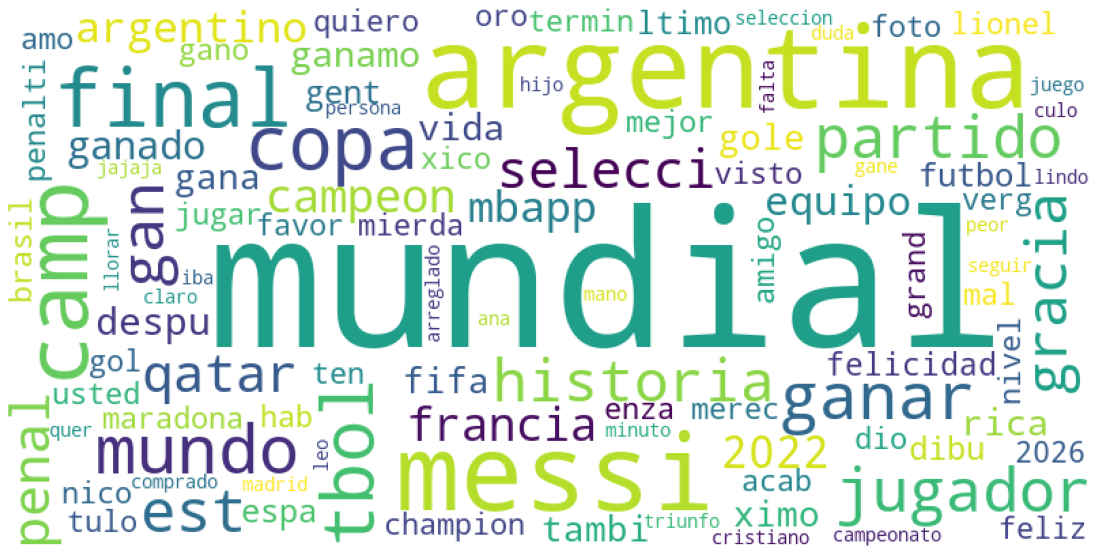

In [13]:
# Se genera una lista vacia para albergar las palabras utilizadas en el histórico de tweets
wordlist = []
for narr in data['Narr']:
    narrative = str(narr).split()
    wordlist.extend(narrative)
# Se genera una nueva lista en la que se eliminen las stopswords
wordlist = [word for word in wordlist if word not in stop_word]
## derivación de palabras
stemmer = PorterStemmer()
stemmed_words = []
for word in wordlist:
    word = stemmer.stem(word)
    if len(word)<=2:
      continue
    stemmed_words.append(word)
# Se genera un diccionario que muestre la frecuencia en la que aparecen las palabras
wordCounter = Counter(stemmed_words)

# Generación de la nube de palabras

wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white',
                      max_words=100,
                      min_font_size=10,
                      collocations=False).generate_from_frequencies(wordCounter)
# Visualización de la nube de palabras
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


**Como se puede ver, la palabra que se repite con mayor frecuencia es mundial, argentina o messi**

In [14]:
# Se refleja en números las 20 palabras que se repiten con mayor frecuencia

df_word = pd.DataFrame()
df_word['Word'] = wordCounter.keys()
df_word['Frequency'] = wordCounter.values()
df_word = df_word.sort_values(by=['Frequency'], ascending=False).head(20)
df_word.style.background_gradient(subset=['Frequency'], cmap='Reds')

,Word,Frequency
4,mundial,19456
32,argentina,3621
12,messi,3192
234,camp,2001
163,final,1768
117,copa,1443
10,tbol,1313
46,mundo,1231
177,ganar,1155
308,jugador,1021


### N-gramas para observar si la secuncia de palabras resulta relevante

Un n-grama es un conjunto de n elementos consecutivos en un documento de texto, que puede incluir palabras, números, símbolos y puntuación. Los modelos de n-gramas son útiles en muchas aplicaciones de análisis textual en el que la secuencia de palabras es relevante, tales como análisis de sentimiento, clasificación de texto y generación de texto.

In [17]:
def ngram(dataframe, feature, first=None, second=None, third=None, bigram=False, trigram=False):
    '''
    Función que devuelve los bigramas o trigramas más comunes
    '''
    list_words = []
    for string in dataframe[feature]:
        list_words.extend(str(string).split())
    list_words = [word for word in list_words if word not in stopwords and len(word)>2]
    # Generación de listas bigramas y trigramas más comunes
    start = first
    middle = second
    end = third
    ngram_list = []
    # Generación de los contadores de bigramas o trigramas
    for index in range(1, len(list_words)):
        if bigram:
            if middle <= (len(list_words) - 1): # Para evitar que se salga del rango de intervalo
                ngram_list.append((list_words[start], list_words[middle]))
        elif trigram:
            if end <= (len(list_words) - 1): # Para evitar que se salga del rango de intervalo
                ngram_list.append((list_words[start], list_words[middle], list_words[end]))
        start = index
        middle = index + 1
        end = index + 2
    ngramCounter = Counter(ngram_list)
    ngramCounterCommon = ngramCounter.most_common(10)
    return ngramCounterCommon

In [18]:
common_bigrams = ngram(dataframe=data, feature='Narr', first=0, second=1, bigram=True)
common_bigrams

[(('del', 'mundial'), 2523),
 (('este', 'mundial'), 1453),
 (('campe', 'mundial'), 1124),
 (('mundial', 'que'), 1015),
 (('del', 'mundo'), 1006),
 (('ganar', 'mundial'), 654),
 (('final', 'del'), 565),
 (('todos', 'los'), 551),
 (('mundial', 'con'), 478),
 (('gan', 'mundial'), 436)]

In [19]:
common_trigrams = ngram(dataframe=data, feature='Narr', first=0, second=1, third=2, trigram=True)
common_trigrams

[(('final', 'del', 'mundial'), 504),
 (('argentina', 'campe', 'mundial'), 248),
 (('mundial', 'qatar', '2022'), 244),
 (('campe', 'del', 'mundo'), 230),
 (('copa', 'del', 'mundo'), 191),
 (('ser', 'campe', 'mundial'), 166),
 (('del', 'mundial', 'qatar'), 133),
 (('del', 'mundial', 'que'), 132),
 (('mejor', 'jugador', 'del'), 132),
 (('argentina', 'gan', 'mundial'), 127)]

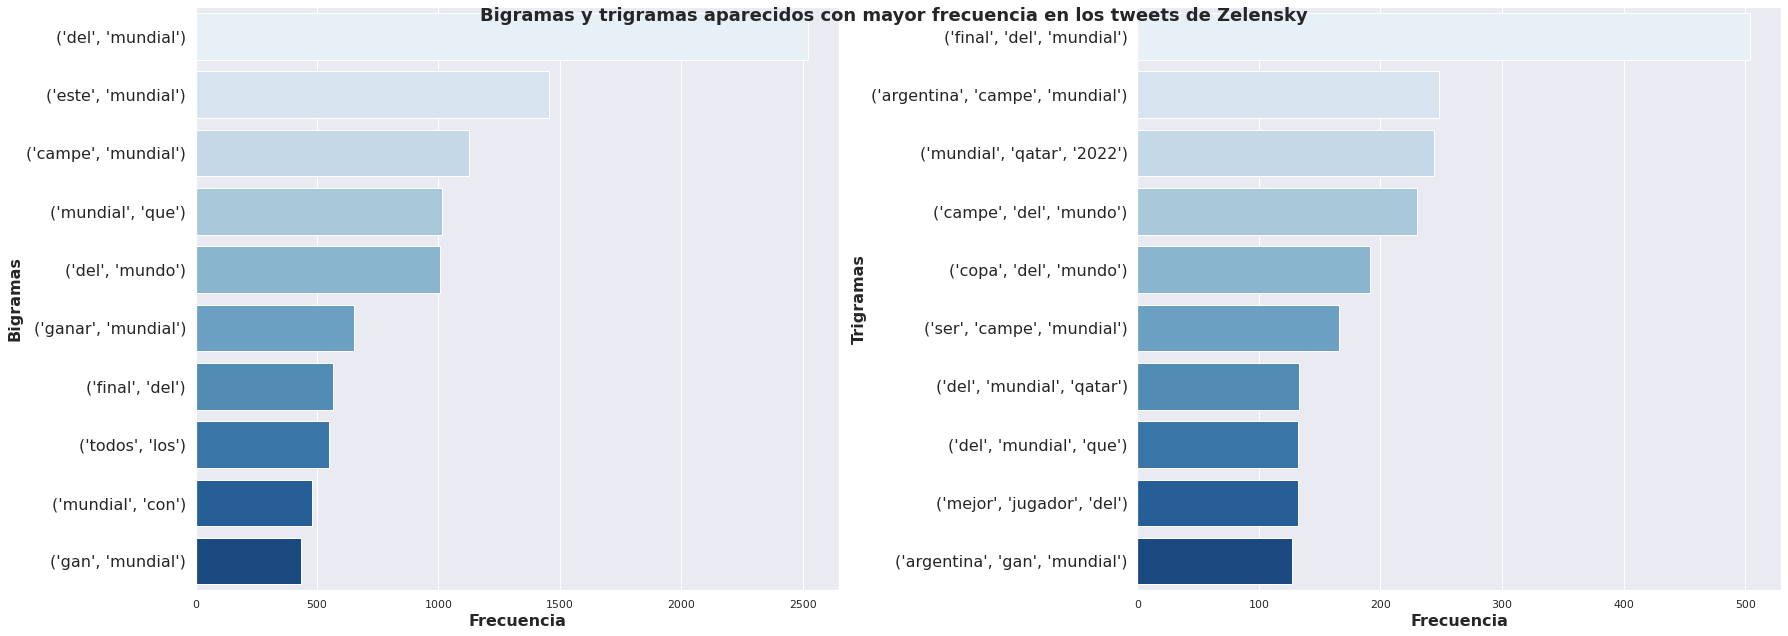

In [20]:
bigrams = dict(common_bigrams)
trigrams = dict(common_trigrams)
ngrams = [bigrams, trigrams]
labels = ['Bigramas', 'Trigramas']
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25,9))
for i, ngram in enumerate(ngrams):
    # Generación del set de dos con las frecuencias de bigramas y trigramas
    df_ngram = pd.DataFrame()
    df_ngram['ngram'] = list(ngram.keys())
    df_ngram['frequency'] = list(ngram.values())
    # Generación de las visualizaciones
    plt.subplot(1, 2, i+1)
    sns.barplot(data=df_ngram, x='frequency', y='ngram' , palette='Blues')
    plt.ylabel(labels[i], weight='bold', fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Frecuencia', weight='bold', fontsize=16)
plt.suptitle('Bigramas y trigramas aparecidos con mayor frecuencia en los tweets de Zelensky', weight='bold', fontsize=18)
plt.tight_layout(pad=1.1)
plt.show()

**Se pueden ver los bigramas y trigramas más comunes. La información aportada puede resultar muy interesante para entender el contenido o mensaje de los diferentes tweets, sobre todo en el caso de los trigramas. Resaltar por ejemplo que el trigrama más repetido hace referencia a la final del mundial. **

# ANÁLISIS DE SENTIMIENTOS

In [21]:
data.head()

,Datetime,Tweet_Id,Text,Username,Narr,Mention,Hashtag
0,2022-12-18 23:59:59+00:00,1604627570431082497,Ahora entienden a los de Independiente que lo ...,BustosNeta,ahora entienden a los de independiente que lo ...,NaN,NaN
1,2022-12-18 23:59:59+00:00,1604627570359734272,@Susita31 @Angelo__20 @Aitor2020 @fifaworldcup...,JanierRMbil,no es normal a los que nos gusta el f tbol no...,"@Susita31, @Angelo__20, @Aitor2020, @fifaworld...",NaN
2,2022-12-18 23:59:59+00:00,1604627568954482688,"@fifaworldcup_es Esto si fue un robo jajaja, q...",MarcePekar,esto si fue un robo jajaja que la chupen y qu...,@fifaworldcup_es,NaN
3,2022-12-18 23:59:59+00:00,1604627568686153728,@fifaworldcup_es Las flores 🫶🏻🇦🇷 https://t.co/...,RamaZurro,las flores,@fifaworldcup_es,NaN
4,2022-12-18 23:59:59+00:00,1604627568505896960,Sigan llorando por la herida. Argentina ganó ...,lutono,sigan llorando por la herida argentina gan muy...,NaN,NaN


## Vader Sentiment


**VADER** (Valence Aware Dictionary for Sentiment Reasoning) es un modelo utilizado para el análisis de sentimientos de texto que es sensible tanto a la polaridad (positiva/negativa) como a la intensidad (fuerza) de la emoción.
El análisis sentimental de VADER se basa en un diccionario que asigna características léxicas a intensidades de emoción conocidas como puntajes de sentimiento. La puntuación de sentimiento de un texto se puede obtener sumando la intensidad de cada palabra del texto.
Por ejemplo, palabras como 'amor', 'disfrutar', 'feliz', 'me gusta' transmiten un sentimiento positivo. Además, VADER es lo suficientemente inteligente como para comprender el contexto básico de estas palabras, distiguiendo, por ejemplo, una declaración negativa como la expresión "no amaba". También comprende el énfasis que puede suponer el expresar una palabra con mayúsculas.

In [22]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [23]:
narr = data['Narr'][3]
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(narr)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [24]:
# Función para establecer el sentimiento de cada uno de los tweets

def sentimentPolarity(x):
    '''
    Función que devuelve una predicción del sentimiento reflejado en el contenido del texto
    '''
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(x)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [25]:
data['Sentiment'] = data['Narr'].apply(lambda x: sentimentPolarity(x))

In [ ]:
data.head()

,Datetime,Tweet_Id,Text,Username,Narr,Mention,Hashtag,Sentiment
0,2022-12-18 23:59:59+00:00,1604627570431082497,Ahora entienden a los de Independiente que lo ...,BustosNeta,ahora entienden a los de independiente que lo ...,NaN,NaN,negative
1,2022-12-18 23:59:59+00:00,1604627570359734272,@Susita31 @Angelo__20 @Aitor2020 @fifaworldcup...,JanierRMbil,no es normal a los que nos gusta el f tbol no...,"@Susita31, @Angelo__20, @Aitor2020, @fifaworld...",NaN,negative
2,2022-12-18 23:59:59+00:00,1604627568954482688,"@fifaworldcup_es Esto si fue un robo jajaja, q...",MarcePekar,esto si fue un robo jajaja que la chupen y qu...,@fifaworldcup_es,NaN,neutral
3,2022-12-18 23:59:59+00:00,1604627568686153728,@fifaworldcup_es Las flores 🫶🏻🇦🇷 https://t.co/...,RamaZurro,las flores,@fifaworldcup_es,NaN,neutral
4,2022-12-18 23:59:59+00:00,1604627568505896960,Sigan llorando por la herida. Argentina ganó ...,lutono,sigan llorando por la herida argentina gan muy...,NaN,NaN,neutral


In [ ]:
data.to_csv('tweets_mundial_sentimiento.csv')

In [ ]:
df_sentiment = data['Sentiment'].value_counts().reset_index().rename(columns={'Sentiment':'Frequency', 'index':'Sentiment'})

# Generación de los elementos visuales
trace0 = go.Bar(x=df_sentiment['Sentiment'],
              y=df_sentiment['Frequency'],
              marker_color=['rgb(95, 70, 144)',
                            'rgb(29, 105, 150)',
                            'rgb(56, 166, 165)'],
              )

trace1 = go.Pie(labels=df_sentiment['Sentiment'],
              values=df_sentiment['Frequency'],
              hoverinfo='label+value',
              hole = 0.3,
              textinfo='percent',
              textfont_size=18,
              marker_colors = px.colors.qualitative.Prism)
# Ajuste de
layout = dict(title='Clasificación de los Tweets en función del tipo de sentimiento identificado',
              yaxis1=dict(showticklabels=True, showgrid=False),
              xaxis1=dict(zeroline=False, showline=False, showticklabels=True, showgrid=False),
              margin=dict(l=200, r=20,t=70,b=70),
              paper_bgcolor='rgb(248, 248, 255)',
              plot_bgcolor='rgb(248, 248, 255)',
              width=1400,
              height=500,
              showlegend=False)


# Creación de subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'xy'}, {'type': 'domain'}]], shared_xaxes=True, shared_yaxes=False)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)

fig.show()

**Como se puede ver, la mayoría de los tweets expresan una opinión positiva (73.7%). Evidentemente, en una situación como esta, y hablando de los comentarios de un lider político,los tweets tienen por objetivo mandar mensajes de esperanza y apoyo hacia la población, todo ello además sustentado en el apoyo recibido por parte de otras naciones.**

# MODELO DE CLASIFICACIÓN DE SENTIMIENTOS
**Una vez que se llevado a cabo un análisis de sentimientos y se ha establecido la categoría de sentimiento correspondiente a cada tweet, se va a proceder con la implementación de un modelo de clasificación de sentimientos. Como se está tratando con texto, se debe llevar a cabo una codificación del texto adecuada al funcionamiento de los algoritmos clasificación. Lo que suele hacerse es utilizar un método que sea capaz de transformar el texto en un vector numérico. Para la clasificación de sentimientos, normalmente se utiliza el algoritmo de frecuencia de término (TF) y frecuencia densa inversa (IDF). Este método se utiliza ampliamente para asignar el nivel de importancia a cada palabra y facilitar así el entendimiento del texto**

## Preprocesamiento del texto
**Aunque el texto ha sido parcialmente procesado para poder llevar a cabo el análisis de texto, se deben llevar otras tareas de preprocesamiento para poder implementar correctamente la metodología**

In [ ]:
# Preprocesado final

def processing_text(x):
    text = ''
    words = x.split()
    words = [stemmer.stem(word) for word in words if word not in stop_word]
    text += ' '.join(words)
    text = re.sub('[^a-z]', ' ', text)
    return text

finaltext = data['Narr'].apply(lambda x: processing_text(x))

data.insert(7, 'FinalText', finaltext)

In [ ]:
df_clf = data[['FinalText', 'Sentiment']]
df_clf

,FinalText,Sentiment
0,entienden independient pediamo demostr mundial...,negative
1,normal gusta f tbol genial messi mbapp cristia...,negative
2,robo jajaja chupen sigan chupando,neutral
3,flore,neutral
4,sigan llorando herida argentina gan mundial,neutral
...,...,...
19996,extra ar mundial,neutral
19997,gan argentina malo fallo arbitral var feo viol...,neutral
19998,gano francia mundial,negative
19999,absolutament pa s mafioso delincuent macri mas...,negative


## Vectorización del texto TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()

# Se analiza alguna de las líneas del documento para ver como el algoritmo crea las listas de palabras
analyze = vectorizer.build_analyzer()
## se analiza el primer registro
analyze(df_clf['FinalText'][0])

['entienden',
 'independient',
 'pediamo',
 'demostr',
 'mundial',
 'termo',
 'mamen',
 'nicola']

In [ ]:
X = vectorizer.fit_transform(df_clf['FinalText']).todense()
X = pd.DataFrame(X, columns=vectorizer.get_feature_names())
X

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaa,aaaaaaaaaaa,aaaaaaaaaaaaa,...,zonal,zoocialista,zopenca,zorrita,ztelo,zubimendi,zurda,zurdo,zurrar,zzz
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19997,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19998,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19999,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Balanceo de clases en la variable sentimiento

In [ ]:
fig = px.bar(data_frame=df_sentiment,
             x='Sentiment',
             y='Frequency',
             color='Frequency',
             labels={'Sentiment': 'Sentimiento', 'Frequency': 'Frecuencia'})
fig.update_layout(title='Clasificación de los Tweets en función del tipo de sentimiento identificado',
                  width=900,
                  height=450)
fig.show()

**Como se ha podido apreciar anteriormente, existe un desequilibrio significativo entre las distintas clases de sentimiento, por lo que para intentar conseguir el mejor resultado posible en la implementación del modelo, se debe utilizar alguna técnica de oversampling. Este caso, se ha decidido utilizar el algoritmo de Técnica de sobremuestreo de minorías sintéticas (SMOTE). Como los tweets que reflejan un sentimiento neutro son muy pocos y la técnica de oversampling no deja de ser un método para crear registros sintéticos, se va a prescindir de los mensajes de contenido neutro y se va a implementar un modelo para distinguir entre mensajes positivos y negativos.**

In [ ]:
df_model = pd.concat([X, df_clf['Sentiment']], axis=1)
df_model = df_model[df_model['Sentiment'] != 'neutral']

In [ ]:
# Codificación de la variable sentimiento
df_model['Sentiment'] = df_model['Sentiment'].map({'positive': 1, 'negative': 0}).astype('int64')

In [ ]:
df_model

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaa,aaaaaaaaaaa,aaaaaaaaaaaaa,...,zoocialista,zopenca,zorrita,ztelo,zubimendi,zurda,zurdo,zurrar,zzz,Sentiment
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
19991,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
19994,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
19998,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


## Separación de los datos en entrenamiento y prueba

In [ ]:
y = df_model[['Sentiment']]
X = df_model.loc[:, df_model.columns != 'Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

In [ ]:
sm = SMOTE()

X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
df_s = y_train.value_counts().reset_index().rename(columns={0: 'Frequency'})


fig = px.bar(data_frame=df_s,
             x='Sentiment',
             y='Frequency',
             labels={'Sentiment': 'Sentimiento', 'Frequency': 'Frecuencia'})
fig.update_layout(title='Clasificación de los Tweets en función del tipo de sentimiento identificado',
                  width=750,
                  height=500)
fig.show()

**Se puede ver perfectamente que la técnica empleada ha servido para equilibrar las dos clases.**

## Implementación del modelo (Árbol de Decisión)
Debido a que el tamaño del set de datos es muy pequeño, antes de separar dataset en datos de entrenamiento y prueba, se va a verificar mediante validación cruzada la precisión del modelo implementado.

### Entrenamiento y Predicción

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
# Entrenamiento
clf.fit(X_train, y_train)
# Predicción
y_pred = clf.predict(X_test)
# Precisión
print(f'La precisión del modelo es: {round(accuracy_score(y_test, y_pred), 3)}')

La precisión del modelo es: 0.83


### Matriz de confusión

In [ ]:
print(f'El informe de clasificación del modelo indica:\n{classification_report(y_test, y_pred)}')

El informe de clasificación del modelo indica:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1726
           1       0.64      0.66      0.65       550

    accuracy                           0.83      2276
   macro avg       0.77      0.77      0.77      2276
weighted avg       0.83      0.83      0.83      2276



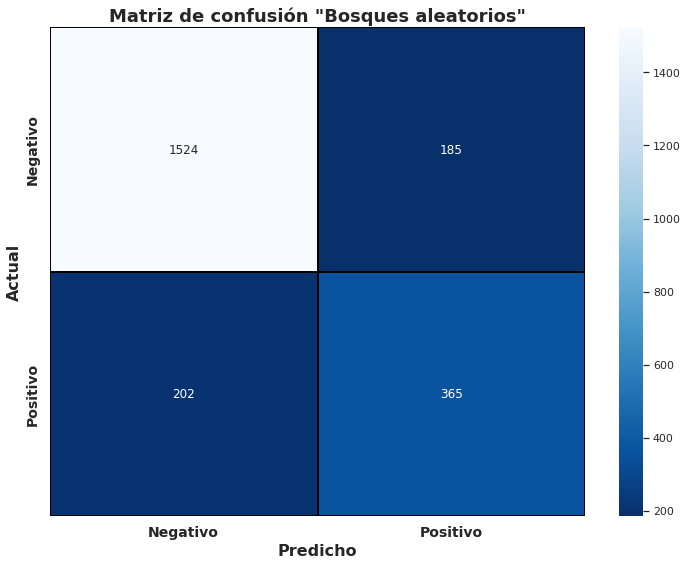

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(cm.T,
            cmap='Blues_r',
            linecolor='black',
            linewidths=1,
            annot=True,
            fmt='',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo']
            )
plt.xlabel('Predicho', weight='bold', fontsize=16)
plt.ylabel('Actual', weight='bold', fontsize=16)
plt.xticks(weight='bold', fontsize=14)
plt.yticks(weight='bold', fontsize=14)
plt.title('Matriz de confusión "Bosques aleatorios"', weight='bold', fontsize=18)
plt.show()

### Curva Roc_Auc

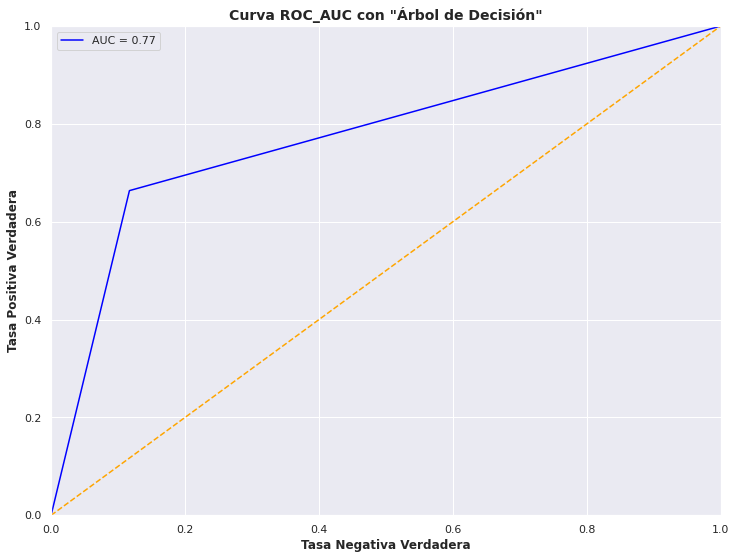

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12, 9))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {round(roc_auc, 2)}')
plt.legend(loc='best')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.plot([0, 1], [0, 1], 'r--', color='orange')
plt.xlabel('Tasa Negativa Verdadera', weight='bold')
plt.ylabel('Tasa Positiva Verdadera', weight='bold')
plt.title(f'Curva ROC_AUC con "Árbol de Decisión"', weight='bold', fontsize=14)
plt.show()

**Como se puede ver, los resultados obtenidos tras la implementación del modelo demuestran que, aunque tiene una buena precisión (78.3%), no tiene una elevada capacidad para distinguir entre clases, tal y como se muestra a través de la matriz de confusión y de la curva roc-auc. Se puede ver que el modelo solo es capaz de identificar correctamente la mitad de registros que corresponden a la clases minoritaria.**

### Top 10 palabras de importancia

In [ ]:
important_words = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance'])
important_words = important_words.sort_values(by=['importance'], ascending=False).head(10)
important_words

,importance
champion,0.09
favor,0.06
ganado,0.06
amor,0.04
xd,0.03
fiesta,0.03
super,0.02
acabado,0.02
gt,0.02
mundial,0.02


**En cuanto al nivel de importancia de las variables, destacan por encima del resto la palabra mundial.**

**Debido a que la capacidad del modelo para distinguir entre clases no es lo suficientemente buena, se va a proceder a la implementación de distintos modelos, por si hay alguno que muestre mejores resultados.**

## Implementación de distintos modelos de clasificación

In [ ]:
# Declaración de los modelos
models = {'K-vecinos': KNeighborsClassifier(),
          'Regresión logística': LogisticRegression(),
          'Árbol de decisión': DecisionTreeClassifier(random_state=42),
          'Bosques de decisión': RandomForestClassifier(random_state=42),
          'Maquina vectorial': SVC(),
          'Clasificador perceptron': MLPClassifier(random_state=42)
          }
# implementación de los modelos

accuracy = []
for label, model in models.items():
    # Entrenamiento del modelo
    model.fit(X_train, y_train)
    # Predicción del modelo
    y_pred = model.predict(X_test)
    # Precisión del modelo
    accuracy.append(round(accuracy_score(y_test, y_pred), 3))
# Generación de la tabla con la precisión de cada modelo
df_accuracy = pd.DataFrame()
df_accuracy['Model'] = models.keys()
df_accuracy['Acc'] = accuracy
df_accuracy

,Model,Acc
0,K-vecinos,0.32
1,Regresión logística,0.86
2,Árbol de decisión,0.83
3,Bosques de decisión,0.85
4,Maquina vectorial,0.85
5,Clasificador perceptron,0.80


**Como se puede ver, ninguno de los modelos implementados muestra una precisión superior al modelo de árbol de Regresión logística**

## Implementación del clasificador de perceptron

In [ ]:
perceptron = MLPClassifier(random_state=42)
# Entrenamiento del modelo
perceptron.fit(X_train, y_train)
# Predicción del modelo
y_pred = perceptron.predict(X_test)
# Precisión del modelo
print(f'La precisión del modelo es: {round(accuracy_score(y_test, y_pred), 3)}')

La precisión del modelo es: 0.803


In [ ]:
print(f'El informe de clasificación del modelo indica:\n{classification_report(y_test, y_pred)}')

### Matriz de confusión

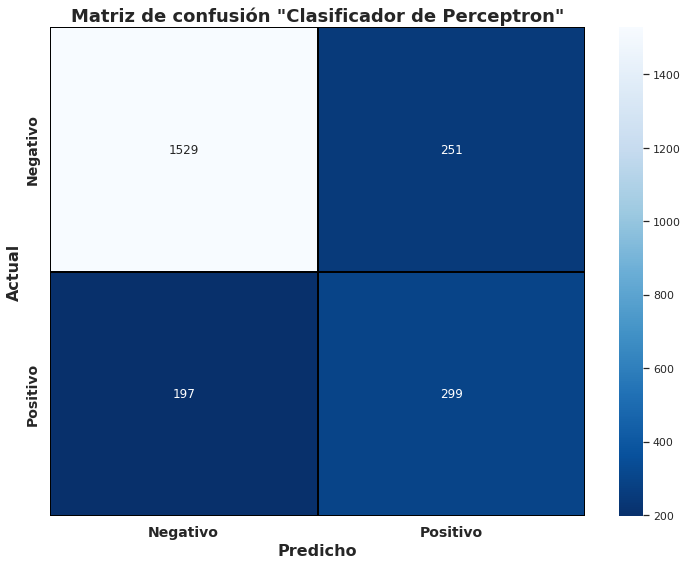

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(cm.T,
            cmap='Blues_r',
            linecolor='black',
            linewidths=1,
            annot=True,
            fmt='',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo']
            )
plt.xlabel('Predicho', weight='bold', fontsize=16)
plt.ylabel('Actual', weight='bold', fontsize=16)
plt.xticks(weight='bold', fontsize=14)
plt.yticks(weight='bold', fontsize=14)
plt.title('Matriz de confusión "Clasificador de Perceptron"', weight='bold', fontsize=18)
plt.show()

### Curva Roc-Auc

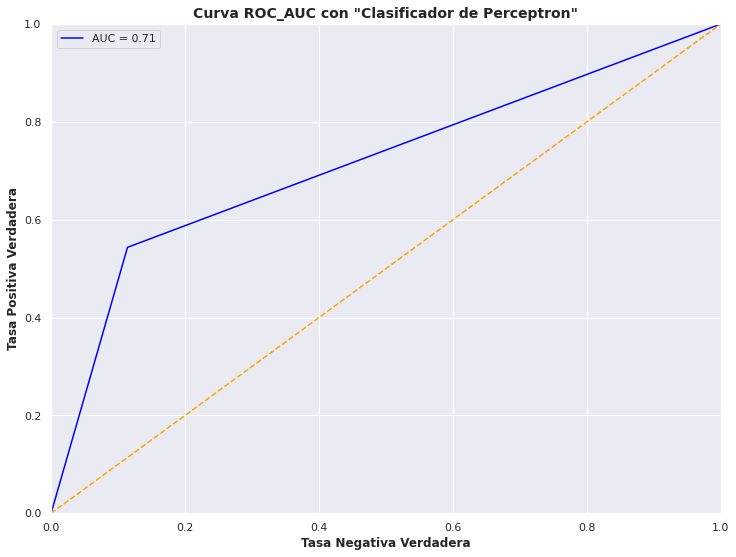

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12, 9))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {round(roc_auc, 2)}')
plt.legend(loc='best')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.plot([0, 1], [0, 1], 'r--', color='orange')
plt.xlabel('Tasa Negativa Verdadera', weight='bold')
plt.ylabel('Tasa Positiva Verdadera', weight='bold')
plt.title(f'Curva ROC_AUC con "Clasificador de Perceptron"', weight='bold', fontsize=14)
plt.show()

**Como se puede ver, con el modelo basado en el clasificador de perceptron no se consigue ninguna mejora. Se observa que el modelo sigue presentando una enorme dificultad para distinguir entre clases e identificar de forma correcta la clase minoritaria**

# CONCLUSIONES
El trabajo desarrollado se ha centrado en analizar los tweets escritos sobre el mundial en el último día de la final del campeonato A continuación se comentan los principales aspectos abordados en este trabajo:

* Se ha utilizado la librería snscraper para obtener la información de twitter. Esta es una librería permite extraer, utilizando muy pocas líneas de código, información de twitter. Además, la información extraída se puede estructurar muy fácilmente en un dataframe.
* Una vez obtenida la información de los tweets, se ha procedido con un pequeño análisis exploratorio de la información:
    * Se ha visto, a través de una nube de palabras, que palabras se repetían con mayor frecuencia en el texto.
* Se ha llevado a cabo un análisis de texto. Antes de comenzar con el análisis de texto, se ha llevado a cabo un procesamiento del texto de la narrativa para eliminar anomalías y caracteres que no aportan información reseñable. Se han utilizado métodos básicos de análisis de texto con el objetivo de entender el contenido del mismo. El análisis de los bigramas y trigramas ha aportado, sobre todo para este último, información sobre el contenido y objeto de los mensajes. Por ejemplo, se ha visto que el trigrama más repetido hace referencia a la final del mundial. Así mismo, también parece que el contenido muchos mensajes revela a Argentina como ganadora del mismo.
* Tras realizar el análisis de texto, se ha llevado a cabo un análisis de sentimientos. Para ello, se ha utilizado el método VADER con el objetivo de identificar si el mensaje tiene un caracter positivo, negativo o neutro. Se ha visto que la mayor parte de tweets representan mensajes positivos.
* Tras clasificar los mensajes, se ha procedido a la implementación de un modelo que sea capaz de clasificar correctamente el objeto del mensaje (positivo o negativo). Debido a que las clases estaban desequilibradas, se han utilizado métodos sintéticos de oversampling para así equilibrar las clases. Por último, se ha implementado el modelo de árbol de decisión, obteniéndose unos nivel de precisión bueno, aunque la matriz de confusión y la curva roc-auc han puesto de manifiesto la dificultad que tiene el modelo para identificar los tweets pertenecientes a la clase minoritaria (solo la mitad son identificados correctamente). Se ha probado una bateria de modelos y se ha visto que ninguno de ellos mejora los resultados obtenidos previamente. Posteriormente, investigando la documentación, se ha visto que para el caso de datos no balanceados suelen funcionar mejor los algoritmos de Boosting (combinan los resultados de varios clasificadores débiles para obtener un clasificador robusto). Al implementar el algoritmo, se ha mejorado significativamente la capacidad predictiva de la clase minoritario, pasando de una precisión del 60% al 67%.

**Conclusión final:** el trabajo ha pretendido mostrar como se puede extraer información de twitter y como se puede analizar el contenido de estos tweets. Así mismo, se ha visto que se puede desarrollar un método para clasificar el sentimiento de los tweets para posteriormente intentar implementar un algoritmo que permita identificar con precisión la categoría o sentimiento a la que pertenece el tweet. En este sentido, convendría probar nuevos modelos e intentar ajustar parámetros que mejoren la capacidad predictiva de la clase minoritaria.